In [1]:
import numpy as np
import math

# **Step 1: Implementing Gates, Activation Function and Loss Functions:**

## 1- Gates:

In [2]:
class Gate:
    def forward(self):
        raise NotImplementedError
    
    def backward(self):
        raise NotImplementedError
    
class AddGate(Gate):
    def forward(self, x, y):
        self.x = x
        self.y = y
        return x + y
    
    def backward(self, dz):
        dx = dz * np.ones_like(self.x)
        dy = dz * np.ones_like(self.y) 
        return dx, dy
    
class MultiplyGate(Gate):
    def forward(self, x, y):
        self.x = x
        self.y = y
        return x * y
    
    def backward(self, dz):
        dx = dz * self.y
        dy = dz * self.x
        
        return dx, dy
    
class SubtractGate(Gate):
    def forward(self, x, y):
        self.x = x
        self.y = y
        return x - y
    
    def backward(self, dz):
        dx = dz * np.ones_like(self.x)
        dy = - dz * np.ones_like(self.y) 
        return dx, dy
    
class DivideGate(Gate):
    def forward(self, x, y):
        self.x = x
        self.y = y
        return x / y
    
    def backward(self, dz):
        dx = dz / self.y
        dy = - dz * self.x / (np.power(self.y, 2))
        return dx, dy
    
class PowerGate(Gate):
    def forward(self, x, y): # Assuming that y is the power 
        self.x = x
        self.y = y
        return np.power(x, y)
    
    def backward(self, dz):
        dx = dz * self.y * np.power(self.x, self.y - 1)
        return dx, None
    
class MaxGate(Gate):
    def forward(self, x, y):
        self.x = x
        self.y = y
        return np.maximum(x, y)
    
    def backward(self, dz):
        return dz * (self.x >= self.y), dz * (self.y > self.x)
    
class MinGate(Gate):
    def forward(self, x, y):
        self.x = x
        self.y = y
        return np.minimum(x, y)
    
    def backward(self, dz):
        return dz * (self.x <= self.y), dz * (self.y < self.x)
    

# Unary inputs: Exponential, Sine, Cosine, Tan

class ExpGate(Gate):
    def forward(self, x):
        self.x = x
        return np.exp(x)
    
    def backward(self, dz):
        return dz * np.exp(self.x)
    
class SineGate(Gate):
    def forward(self, x):
        self.x = x
        return np.sin(x)
    
    def backward(self, dz):
        return dz * np.cos(self.x)
    
class CosineGate(Gate):
    def forward(self, x):
        self.x = x
        return np.cos(x)
    
    def backward(self, dz):
        return -dz * np.sin(self.x)
    
class TanGate(Gate):
    def forward(self, x):
        self.x = x
        return np.tan(x)
    
    def backward(self, dz):
        return dz * (1 / np.power(np.cos(self.x), 2))
    

## 2- Activation Functions:

In [3]:
class linear(Gate):
    def forward(self, x):
        self.x = x
        return x
    
    def backward(self, dz):
        return dz

class relu(Gate):
    def forward(self, x):
        self.x = x
        return np.maximum(0, x)
    
    def backward(self, dz):
        return dz if self.x > 0 else 0

class sigmoid(Gate):
    def forward(self, x):
        self.x = x
        return 1 / (1 + np.exp(-np.array(x)))
    
    def backward(self, dz):
        return dz * self.forward(self.x)(1 - self.forward(self.x))    

class softmax(Gate):
    def forward(self, x):
        self.x = x
        return np.exp(x) / np.sum(np.exp(x), axis = -1, keepdims = True)
    
    def backward(self, dz):
        return dz * self.forward(self.x) * (1 - self.forward(self.x))

class tanh(Gate):
    def forward(self, x):
        self.x = x
        return np.tanh(x)
    
    def backward(self, dz):
        return dz * (1 - np.tanh(self.x) * 2)

## 3- Loss Functions:

In [4]:
class binary_cross_entropy(Gate):
    def forward(self, y, y_hat):
        self.y = y
        self.y_hat = y_hat
        return - np.mean( y * np.log(y_hat) + (1 - y) * np.log(1 - y_hat))
    
    def backward(self, dz):
        return dz * (self.y_hat - self.y) / (self.y_hat * (1 - self.y_hat))
    
    
class l2_loss(Gate):
    def forward(self, y, y_hat):
        self.y = y
        self.y_hat = y_hat
        return 0.5 * np.mean(np.power(y - y_hat, 2))
    
    def backward(self, dz):
        return dz * (self.y_hat - self.y)

### Test cases:

In [5]:
x = 3
y = 4

print(f"x = {x}, y = {y}")

add_gate = AddGate()
output = add_gate.forward(x,y)
print("Add Gate = ", output)

multiply_gate = MultiplyGate()
output = multiply_gate.forward(x,y)
print("Multiply Gate = ", output)

subtract_gate = SubtractGate()
output = subtract_gate.forward(y,x)
print("Subtract Gate = ", output)

division_gate = DivideGate()
output = division_gate.forward(x,y)
print("Division Gate = ", output)

power_gate = PowerGate()
output = power_gate.forward(x,y)
print("Power Gate = ", output)

max_gate = MaxGate()
output = max_gate.forward(x,y)
print("Max Gate = ", output)

min_gate = MinGate()
output = min_gate.forward(x,y)
print("Min Gate = ", output)

exp_gate = ExpGate()
output = exp_gate.forward(x)
print("Exp Gate = ", output)

sine_gate = SineGate()
output = sine_gate.forward(x)
print("Sine Gate = ", output)

cosine_gate = CosineGate()
output = cosine_gate.forward(x)
print("Cosine Gate = ", output)

tan_gate = TanGate()
output = tan_gate.forward(x)
print("Tan Gate = ", output)

relu_function = relu()
output = relu_function.forward([-1, 2, 5, 0, -10, 6])
print("-> Relu of [-1, 2, 5, 0, -10, 6] = ", output)

sigmoid_function = sigmoid()
output = sigmoid_function.forward([-1, 2, 5, 0, -10, 6])
print("-> Sigmoid of [-1, 2, 5, 0, -10, 6] = ", output)

softmax_function = softmax()
output = softmax_function.forward([-1, 2, 5, 0, -10, 6])
print("-> Softmax of [-1, 2, 5, 0, -10, 6] = ", output)

tanh_function = tanh()
output = tanh_function.forward([-1, 2, 5, 0, -10, 6])
print("-> Tanh of [-1, 2, 5, 0, -10, 6] = ", output)

bce_loss = binary_cross_entropy()
result = bce_loss.forward(1, 0.8)
print("--> BCE loss = ", result)

mse_loss = l2_loss()
result = mse_loss.forward(1, 0.8)
print("--> L2 loss = ", result)

x = 3, y = 4
Add Gate =  7
Multiply Gate =  12
Subtract Gate =  1
Division Gate =  0.75
Power Gate =  81
Max Gate =  4
Min Gate =  3
Exp Gate =  20.085536923187668
Sine Gate =  0.1411200080598672
Cosine Gate =  -0.9899924966004454
Tan Gate =  -0.1425465430742778
-> Relu of [-1, 2, 5, 0, -10, 6] =  [0 2 5 0 0 6]
-> Sigmoid of [-1, 2, 5, 0, -10, 6] =  [2.68941421e-01 8.80797078e-01 9.93307149e-01 5.00000000e-01
 4.53978687e-05 9.97527377e-01]
-> Softmax of [-1, 2, 5, 0, -10, 6] =  [6.56225724e-04 1.31806460e-02 2.64740352e-01 1.78380646e-03
 8.09846881e-08 7.19638889e-01]
-> Tanh of [-1, 2, 5, 0, -10, 6] =  [-0.76159416  0.96402758  0.9999092   0.         -1.          0.99998771]
--> BCE loss =  0.2231435513142097
--> L2 loss =  0.01999999999999999


<a name="toc_40291_2.1"></a>
## Gradient descent summary
developing a linear model that predicts $f_{w,b}(x^{(i)})$:
$$f_{w,b}(x^{(i)}) = wx^{(i)} + b \tag{1}$$
In linear regression, you utilize input training data to fit the parameters $w$,$b$ by minimizing a measure of the error between our predictions $f_{w,b}(x^{(i)})$ and the actual data $y^{(i)}$. The measure is called the $cost$, $J(w,b)$. In training you measure the cost over all of our training samples $x^{(i)},y^{(i)}$
$$J(w,b) = \frac{1}{2m} \sum\limits_{i = 0}^{m-1} (f_{w,b}(x^{(i)}) - y^{(i)})^2\tag{2}$$ 

**Compute_Cost**

In [7]:
#Function to calculate the cost
def compute_cost(x, y, w, b):
   
    m = x.shape[0] 
    cost = 0
    
    for i in range(m):
        f_wb = w * x[i] + b
        cost = cost + (f_wb - y[i])**2
    total_cost = 1 / (2 * m) * cost

    return total_cost


*gradient descent* as:

$$\begin{align*} \text{repeat}&\text{ until convergence:} \; \lbrace \newline
\;  w &= w -  \alpha \frac{\partial J(w,b)}{\partial w} \tag{3}  \; \newline 
 b &= b -  \alpha \frac{\partial J(w,b)}{\partial b}  \newline \rbrace
\end{align*}$$
where, parameters $w$, $b$ are updated simultaneously.  
The gradient is defined as:
$$
\begin{align}
\frac{\partial J(w,b)}{\partial w}  &= \frac{1}{m} \sum\limits_{i = 0}^{m-1} (f_{w,b}(x^{(i)}) - y^{(i)})x^{(i)} \tag{4}\\
  \frac{\partial J(w,b)}{\partial b}  &= \frac{1}{m} \sum\limits_{i = 0}^{m-1} (f_{w,b}(x^{(i)}) - y^{(i)}) \tag{5}\\
\end{align}
$$



In [10]:
import math, copy
import numpy as np
import matplotlib.pyplot as plt

# Load our data set
x_train = np.array([1.0, 2.0])   #features
y_train = np.array([300.0, 500.0])   #target value

def compute_gradient(x, y, w, b): 
    """
    Computes the gradient for linear regression 
    Args:
      x (ndarray (m,)): Data, m examples 
      y (ndarray (m,)): target values
      w,b (scalar)    : model parameters  
    Returns
      dj_dw (scalar): The gradient of the cost w.r.t. the parameters w
      dj_db (scalar): The gradient of the cost w.r.t. the parameter b     
     """
    
    # Number of training examples
    m = x.shape[0]    
    dj_dw = 0
    dj_db = 0
    
    for i in range(m):  
        f_wb = w * x[i] + b 
        dj_dw_i = (f_wb - y[i]) * x[i] 
        dj_db_i = f_wb - y[i] 
        dj_db += dj_db_i
        dj_dw += dj_dw_i 
    dj_dw = dj_dw / m 
    dj_db = dj_db / m 
        
    return dj_dw, dj_db

In [11]:
def gradient_descent(x, y, w_in, b_in, alpha, num_iters, cost_function, gradient_function): 
    """
    Performs gradient descent to fit w,b. Updates w,b by taking 
    num_iters gradient steps with learning rate alpha
    
    Args:
      x (ndarray (m,))  : Data, m examples 
      y (ndarray (m,))  : target values
      w_in,b_in (scalar): initial values of model parameters  
      alpha (float):     Learning rate
      num_iters (int):   number of iterations to run gradient descent
      cost_function:     function to call to produce cost
      gradient_function: function to call to produce gradient
      
    Returns:
      w (scalar): Updated value of parameter after running gradient descent
      b (scalar): Updated value of parameter after running gradient descent
      J_history (List): History of cost values
      p_history (list): History of parameters [w,b] 
      """
    
    # An array to store cost J and w's at each iteration primarily for graphing later
    J_history = []
    p_history = []
    b = b_in
    w = w_in
    
    for i in range(num_iters):
        # Calculate the gradient and update the parameters using gradient_function
        dj_dw, dj_db = gradient_function(x, y, w , b)     

        # Update Parameters using equation (3) above
        b = b - alpha * dj_db                            
        w = w - alpha * dj_dw                            

        # Save cost J at each iteration
        if i<100000:      # prevent resource exhaustion 
            J_history.append( cost_function(x, y, w , b))
            p_history.append([w,b])
        # Print cost every at intervals 10 times or as many iterations if < 10
        if i% math.ceil(num_iters/10) == 0:
            print(f"Iteration {i:4}: Cost {J_history[-1]:0.2e} ",
                  f"dj_dw: {dj_dw: 0.3e}, dj_db: {dj_db: 0.3e}  ",
                  f"w: {w: 0.3e}, b:{b: 0.5e}")
 
    return w, b, J_history, p_history #return w and J,w history for graphing

In [12]:
# initialize parameters
w_init = 0
b_init = 0
# some gradient descent settings
iterations = 10000
tmp_alpha = 1.0e-2
# run gradient descent
w_final, b_final, J_hist, p_hist = gradient_descent(x_train ,y_train, w_init, b_init, tmp_alpha, 
                                                    iterations, compute_cost, compute_gradient)
print(f"(w,b) found by gradient descent: ({w_final:8.4f},{b_final:8.4f})")

Iteration    0: Cost 7.93e+04  dj_dw: -6.500e+02, dj_db: -4.000e+02   w:  6.500e+00, b: 4.00000e+00
Iteration 1000: Cost 3.41e+00  dj_dw: -3.712e-01, dj_db:  6.007e-01   w:  1.949e+02, b: 1.08228e+02
Iteration 2000: Cost 7.93e-01  dj_dw: -1.789e-01, dj_db:  2.895e-01   w:  1.975e+02, b: 1.03966e+02
Iteration 3000: Cost 1.84e-01  dj_dw: -8.625e-02, dj_db:  1.396e-01   w:  1.988e+02, b: 1.01912e+02
Iteration 4000: Cost 4.28e-02  dj_dw: -4.158e-02, dj_db:  6.727e-02   w:  1.994e+02, b: 1.00922e+02
Iteration 5000: Cost 9.95e-03  dj_dw: -2.004e-02, dj_db:  3.243e-02   w:  1.997e+02, b: 1.00444e+02
Iteration 6000: Cost 2.31e-03  dj_dw: -9.660e-03, dj_db:  1.563e-02   w:  1.999e+02, b: 1.00214e+02
Iteration 7000: Cost 5.37e-04  dj_dw: -4.657e-03, dj_db:  7.535e-03   w:  1.999e+02, b: 1.00103e+02
Iteration 8000: Cost 1.25e-04  dj_dw: -2.245e-03, dj_db:  3.632e-03   w:  2.000e+02, b: 1.00050e+02
Iteration 9000: Cost 2.90e-05  dj_dw: -1.082e-03, dj_db:  1.751e-03   w:  2.000e+02, b: 1.00024e+02


# **Bonus Part Implementation:**

## Learning Rate Scheduler:

##### ***Exponential Decay:***
The following formula was used as reference from Stanford University slides. The hyperparameter `k` was set to 0.1 by default.

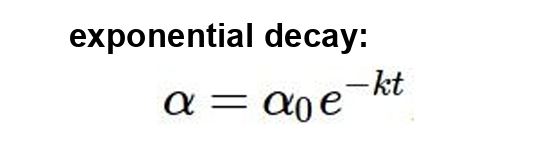

Plotting the exponential decay of the learning for 100 epochs

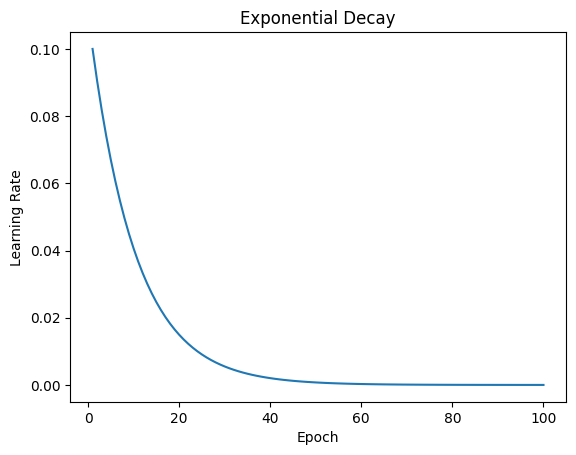

##### ***Step Decay:***
Used to drop the learning rate by a factor every few epochs.

Plotting the step decay of the learning for 100 epochs

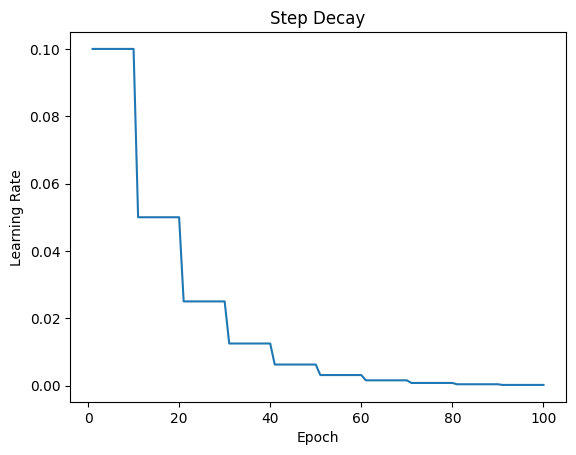

##### ***1/t Decay:***
This implementation was also referenced from Standford University slides. This formula is as given:

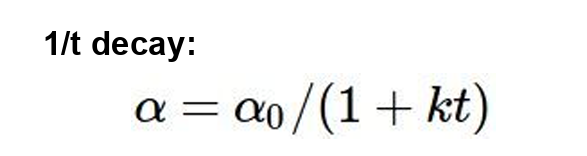

Plotting the 1/t decay of the learning for 100 epochs. It was noted that the output curve is similar to the exponential decay

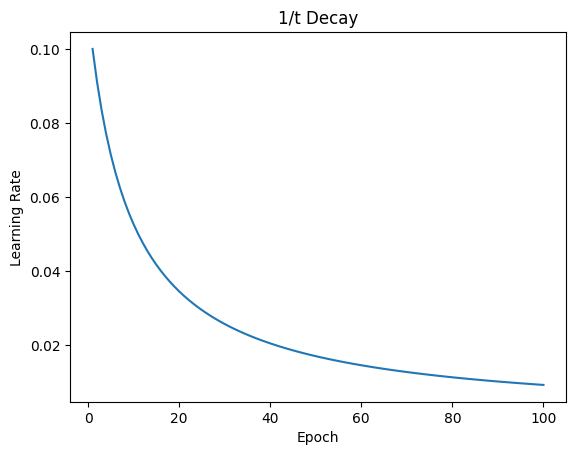

> Note: the test and plotting implementations are mentioned below in *Test* section

### Code:

In [ ]:

class learning_rate_scheduler():
    def __init__(self):
        self.learning_rate = 0.1
        self.decay_steps = 10000
        self.drop_rate = 0.5
        self.epochs_drop_after = 10
        self.k = 0.1
        
    # def exp_decay(self, epoch):
    #     return self.learning_rate * self.decay_rate ** (epoch / self.decay_steps)
    
    def exponential_decay(self, epoch):
        return self.learning_rate * math.exp(- self.k * epoch)
    
    def step_decay(self, epoch):
        return self.learning_rate * math.pow(self.drop_rate,  (epoch // self.epochs_drop_after))
    
    # def adaptive_learning_rate(self, epoch):
    #     if epoch < 5:
    #         return self.learning_rate
    #     elif epoch < 10:
    #         return self.learning_rate / 2
    #     else:
    #         return self.learning_rate / 10
    
    def t_decay(self, epoch):
        return self.learning_rate / (1 + self.k * epoch)

### Test:

Epoch: 1, Learning Rate: 0.1
Epoch: 2, Learning Rate: 0.09048374180359596
Epoch: 3, Learning Rate: 0.0818730753077982
Epoch: 4, Learning Rate: 0.0740818220681718
Epoch: 5, Learning Rate: 0.06703200460356394
Epoch: 6, Learning Rate: 0.06065306597126335
Epoch: 7, Learning Rate: 0.05488116360940264
Epoch: 8, Learning Rate: 0.04965853037914095
Epoch: 9, Learning Rate: 0.044932896411722156
Epoch: 10, Learning Rate: 0.04065696597405991
Epoch: 11, Learning Rate: 0.036787944117144235
Epoch: 12, Learning Rate: 0.03328710836980796
Epoch: 13, Learning Rate: 0.030119421191220203
Epoch: 14, Learning Rate: 0.02725317930340126
Epoch: 15, Learning Rate: 0.024659696394160643
Epoch: 16, Learning Rate: 0.022313016014842982
Epoch: 17, Learning Rate: 0.02018965179946554
Epoch: 18, Learning Rate: 0.018268352405273462
Epoch: 19, Learning Rate: 0.016529888822158653
Epoch: 20, Learning Rate: 0.014956861922263504
Epoch: 21, Learning Rate: 0.013533528323661271
Epoch: 22, Learning Rate: 0.012245642825298192
Epoch

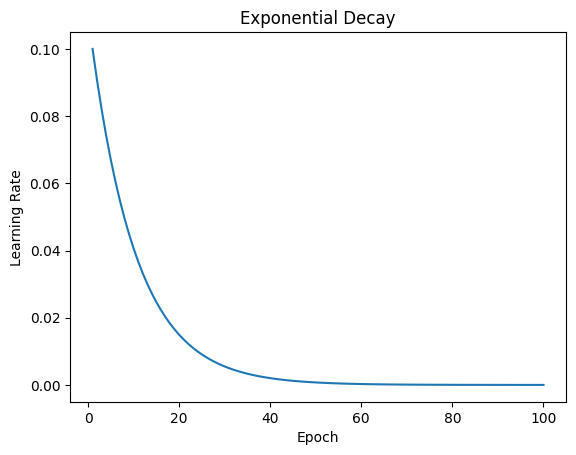

In [ ]:
import matplotlib.pyplot as plt 

lr_scheduler = learning_rate_scheduler()
num_epochs = 100
learning_rates = []

for epoch in range(num_epochs):
    new_learning_rate = lr_scheduler.exponential_decay(epoch)
    print(f"Epoch: {epoch+1}, Learning Rate: {new_learning_rate}")
    
    learning_rates.append(new_learning_rate)
    
plt.plot(range(1, num_epochs + 1), learning_rates)
plt.xlabel('Epoch')
plt.ylabel('Learning Rate')
plt.title('Exponential Decay')
plt.show()

Epoch: 1, Learning Rate: 0.1
Epoch: 2, Learning Rate: 0.1
Epoch: 3, Learning Rate: 0.1
Epoch: 4, Learning Rate: 0.1
Epoch: 5, Learning Rate: 0.1
Epoch: 6, Learning Rate: 0.1
Epoch: 7, Learning Rate: 0.1
Epoch: 8, Learning Rate: 0.1
Epoch: 9, Learning Rate: 0.1
Epoch: 10, Learning Rate: 0.1
Epoch: 11, Learning Rate: 0.05
Epoch: 12, Learning Rate: 0.05
Epoch: 13, Learning Rate: 0.05
Epoch: 14, Learning Rate: 0.05
Epoch: 15, Learning Rate: 0.05
Epoch: 16, Learning Rate: 0.05
Epoch: 17, Learning Rate: 0.05
Epoch: 18, Learning Rate: 0.05
Epoch: 19, Learning Rate: 0.05
Epoch: 20, Learning Rate: 0.05
Epoch: 21, Learning Rate: 0.025
Epoch: 22, Learning Rate: 0.025
Epoch: 23, Learning Rate: 0.025
Epoch: 24, Learning Rate: 0.025
Epoch: 25, Learning Rate: 0.025
Epoch: 26, Learning Rate: 0.025
Epoch: 27, Learning Rate: 0.025
Epoch: 28, Learning Rate: 0.025
Epoch: 29, Learning Rate: 0.025
Epoch: 30, Learning Rate: 0.025
Epoch: 31, Learning Rate: 0.0125
Epoch: 32, Learning Rate: 0.0125
Epoch: 33, Le

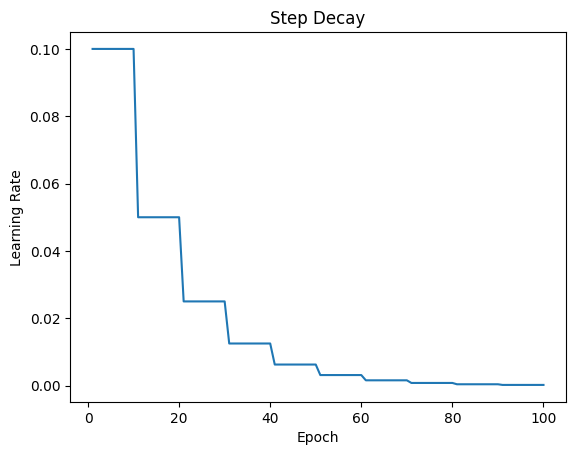

In [ ]:
learning_rates = []

for epoch in range(num_epochs):
    new_learning_rate = lr_scheduler.step_decay(epoch)
    print(f"Epoch: {epoch+1}, Learning Rate: {new_learning_rate}")
    
    learning_rates.append(new_learning_rate)
    
plt.plot(range(1, num_epochs + 1), learning_rates)
plt.xlabel('Epoch')
plt.ylabel('Learning Rate')
plt.title('Step Decay')
plt.show()

Epoch: 1, Learning Rate: 0.1
Epoch: 2, Learning Rate: 0.09090909090909091
Epoch: 3, Learning Rate: 0.08333333333333334
Epoch: 4, Learning Rate: 0.07692307692307693
Epoch: 5, Learning Rate: 0.07142857142857144
Epoch: 6, Learning Rate: 0.06666666666666667
Epoch: 7, Learning Rate: 0.0625
Epoch: 8, Learning Rate: 0.058823529411764705
Epoch: 9, Learning Rate: 0.05555555555555556
Epoch: 10, Learning Rate: 0.052631578947368425
Epoch: 11, Learning Rate: 0.05
Epoch: 12, Learning Rate: 0.047619047619047616
Epoch: 13, Learning Rate: 0.045454545454545456
Epoch: 14, Learning Rate: 0.04347826086956522
Epoch: 15, Learning Rate: 0.041666666666666664
Epoch: 16, Learning Rate: 0.04
Epoch: 17, Learning Rate: 0.038461538461538464
Epoch: 18, Learning Rate: 0.037037037037037035
Epoch: 19, Learning Rate: 0.03571428571428572
Epoch: 20, Learning Rate: 0.034482758620689655
Epoch: 21, Learning Rate: 0.03333333333333333
Epoch: 22, Learning Rate: 0.03225806451612903
Epoch: 23, Learning Rate: 0.03125
Epoch: 24, Lea

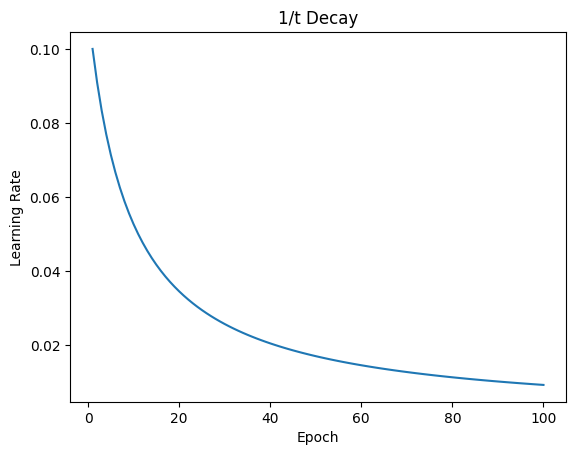

In [ ]:
learning_rates = []

for epoch in range(num_epochs):
    new_learning_rate = lr_scheduler.t_decay(epoch)
    print(f"Epoch: {epoch+1}, Learning Rate: {new_learning_rate}")
    
    learning_rates.append(new_learning_rate)
    
plt.plot(range(1, num_epochs + 1), learning_rates)
plt.xlabel('Epoch')
plt.ylabel('Learning Rate')
plt.title('1/t Decay')
plt.show()